In [ ]:
Quantas retiradas de barra é bom
melhor seção

In [119]:
import sys
sys.path.insert(0, '../')
from pytest import approx
import fconcrete as fc
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=4, suppress=True, linewidth=3000)
from math import sin, tan,  pi
from fconcrete.helpers import cond
import copy

In [38]:
material = fc.Material(E='27000 MPa', poisson=1, alpha=1)
section = fc.Rectangle(25,44.6)

#Design
f1 = fc.Load.UniformDistributedLoad(-0.1622, x_begin=0, x_end=113)
f2 = fc.Load.UniformDistributedLoad(-0.4994, x_begin=113, x_end=583)
f3 = fc.Load.UniformDistributedLoad(-0.4196, x_begin=583, x_end=1188)

n1 = fc.Node.SimpleSupport(x=0, length=20)
n2 = fc.Node.SimpleSupport(x=113, length=20)
n3 = fc.Node.SimpleSupport(x=583, length=20)
n4 = fc.Node.SimpleSupport(x=1188, length=20)

bar1 = fc.SingleBeamElement([n1, n2], section, material)
bar2 = fc.SingleBeamElement([n2, n3], section, material)
bar3 = fc.SingleBeamElement([n3, n4], section, material)

fc.config.available_material = {
    "concrete_long_steel_bars":fc.AvailableLongConcreteSteelBar(diameters=[8]),
    "concrete_transv_steel_bars":fc.AvailableTransvConcreteSteelBar(diameters=[8]),
}
    
beam = fc.Beam(
    loads = [f1, f2, f3],
    beam_elements = [bar1, bar2, bar3],
    bar_steel_max_removal = 2,
)

self1 = copy.deepcopy(beam)

entrou
entrou


In [24]:
beam._c1

80745.24861216143

0.00016180423077366267


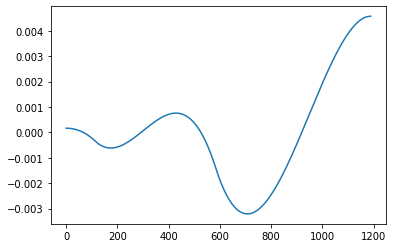

In [27]:
print(beam.getRotationDiagram()[1][0])
beam.plotRotationDiagram()

In [28]:
import sys
sys.path.insert(0, '../')
from pytest import approx
import fconcrete as fc
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=4, suppress=True, linewidth=3000)
from math import sin, tan,  pi
from fconcrete.helpers import cond


material = fc.Material(E='27000 MPa', poisson=1, alpha=1)
section = fc.Rectangle(25,44.6)

#Design
f1 = fc.Load.UniformDistributedLoad(-0.1622, x_begin=0, x_end=113)

n1 = fc.Node.Crimp(x=0)
n2 = fc.Node.Free(x=113)

bar1 = fc.SingleBeamElement([n1, n2], section, material)

fc.config.available_material = {
    "concrete_long_steel_bars":fc.AvailableLongConcreteSteelBar(diameters=[8]),
    "concrete_transv_steel_bars":fc.AvailableTransvConcreteSteelBar(diameters=[8]),
}
    
beam = fc.Beam(
    loads = [f1],
    beam_elements = [bar1]
)

self2 = beam

entrou


In [30]:
beam._c1

-0.0

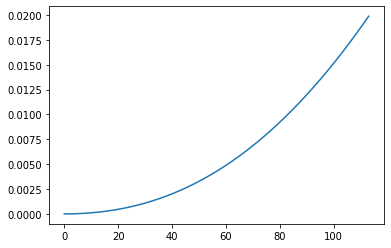

In [4]:
beam.plotDisplacementDiagram()

2.0751556478324717e-11


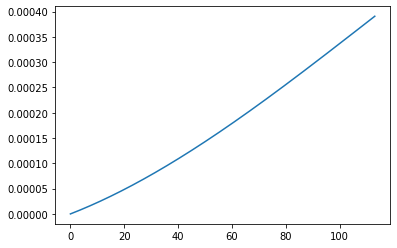

In [29]:
print(beam.getRotationDiagram()[1][0])
beam.plotRotationDiagram()

In [66]:
def getDisplacementParcial(self, x, c1=0, c2=0):
    if isinstance(x, int) or isinstance(x, float):
        
        if x < self.x_begin or x > self.x_end:
            return 0
        f_value = 0
        
        _, single_beam_element = self.getSingleBeamElementInX(x)
        for load in self.loads:
            f_value += load.momentum * \
                cond(x-load.x_begin, order=2)/2 if load.x_begin == load.x_end else 0
            f_value += load.force * \
                cond(x-load.x_begin, order=3)/6 if load.order == 0 else 0
            f_value += (load.q*cond(x-load.x_begin, order=load.order+3) -
                        load.q*cond(x-load.x_end, order=load.order+3))/((load.order+1)*(load.order+2)*(load.order+3))
        
        f_value += c1*x+c2
        return f_value
    elif isinstance(x, np.ndarray) or isinstance(x, list):
        return np.array([ getDisplacementParcial(self,x_element, c1, c2) for x_element in x ])

In [67]:
def getRotationParcial(self, x, c1=0):
    if isinstance(x, int) or isinstance(x, float):
        if x < self.x_begin or x > self.x_end:
            return 0
        f_value = 0
        
        _, single_beam_element = self.getSingleBeamElementInX(x)
        for load in self.loads:
            f_value += load.momentum * \
                cond(x-load.x_begin, order=1) if load.x_begin == load.x_end else 0
            f_value += load.force * \
                cond(x-load.x_begin, order=2)/2 if load.order == 0 else 0
            f_value += (load.q*cond(x-load.x_begin, order=load.order+2) -
                        load.q*cond(x-load.x_end, order=load.order+2))/((load.order+1)*(load.order+2))
        
        f_value += c1
        return f_value
    elif isinstance(x, np.ndarray) or isinstance(x, list):
        return np.array([ getDisplacementParcial(self,x_element, c1, c2) for x_element in x ])

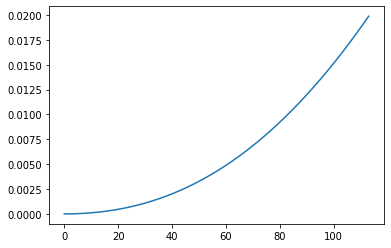

In [73]:
# Get constants of displacement function
self = self2

x, y = self.getMomentumDiagram()
null_displacement = self.nodes.x[self.nodes.condition_boundary[:, 1]==1]
null_rotation = self.nodes.x[self.nodes.condition_boundary[:, 0]==0]

x1 = null_displacement[0]

if len(null_displacement)>=2:
    rest1 = getDisplacementParcial(self, x1)
    x2 = null_displacement[-1]
    rest2 = getDisplacementParcial(self, x2)
    c1 = -(rest1 - rest2)/(x1-x2)
    c2 = rest1 + c1*x1
    
elif len(null_rotation)>=1 and len(null_displacement)>=1:
    x2 = null_rotation[0]
    c1 = -getRotationParcial(self, x2)
    rest1 = getDisplacementParcial(self, x2)
    c2 = rest1 + c1*x1
    
    
y_d = getDisplacementParcial(self, x, c1=c1, c2=c2)/self.bars[0].flexural_rigidity
plt.plot(x, y_d)


In [74]:
c1, c2

(-0.0, -0.0)

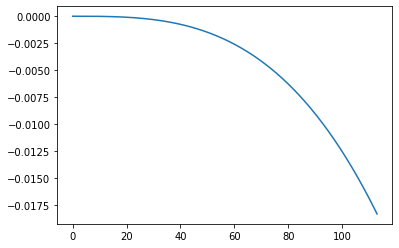

In [57]:
y_d = getDisplacementParcial(self, x, c1=-c1, c2=c2)/self.bars[0].flexural_rigidity
plt.plot(x, y_d)


In [8]:
a = abs(y_d.copy())
a.sort()

In [9]:
max(a)

0.7569819104511519

In [252]:
for null_displacement_u in null_displacement:
    print(np.interp(null_displacement_u, x, y_d))

7.195243205345225e-11
-6.672953907423019e-09
-1.860184507301079e-07
-2.031846166052598e-09


In [221]:
np.interp(583, x, y_d)

-2076.3167922731373

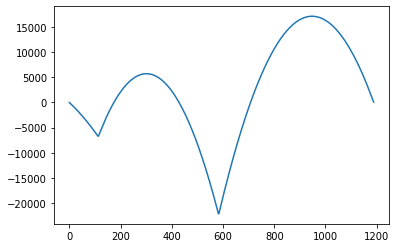

In [128]:
plt.plot(x, np.gradient(np.gradient(getDisplacementParcial(self, x, c1=c1, c2=c2))))

In [129]:
np.gradient(np.gradient(getDisplacementParcial(self, x, c1=c1, c2=c2)))[-1]

84.54928207397461

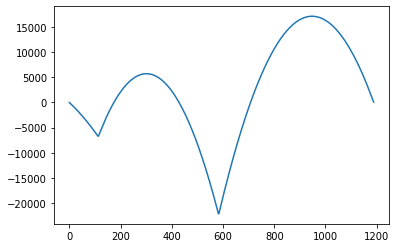

In [121]:
plt.plot(x, np.gradient(np.gradient(getDisplacement(self, x))))

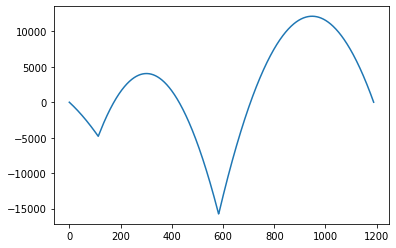

In [130]:
plt.plot(x, beam.getMomentumDiagram()[1])

In [132]:
x, y = beam.getMomentumDiagram()
np.trapz(x, y, dx=0.001, axis=1)

IndexError: list assignment index out of range

In [133]:
from scipy import integrate

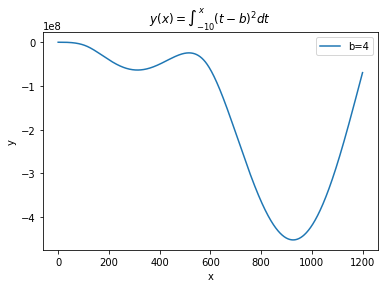

In [153]:
def integrals(f, xs):
    x_range = []
    y_range = []
    results = []
    for x in xs:
        x_range.append(x)
        y_range.append(f(x))
        integral = integrate.simps(y_range, x_range)
        results.append(integral)
    return results

def f(x):
    return beam.getInternalMomentumStrength(x)

xs = np.linspace(0, 1200, 1200)
vlinha = integrals(lambda x: f(x), xs)

def flinha(x):
    return np.interp(x, xs, vlinha)


displacement = integrals(lambda x: flinha(x), xs)
#plt.plot(xs, integrals(lambda x: f(x), xs), label='b=4')
plt.plot(xs, displacement, label='b=4')

plt.title('$y(x) = \int_{-10}^{x}(t-b)^2dt$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [148]:
np.interp(920.2, xs, np.array(displacement)/self.bars[0].flexural_rigidity)

-0.04028326431552984

In [155]:
integrate.RK23(f, 0, np.zeros(len(xs)), 1200)

TypeError: f() takes 1 positional argument but 2 were given

In [24]:
name

'crimped_simple_supported'

In [1]:
import sys
sys.path.insert(0, '../')
from fconcrete import config, duplicated, Material, Beam, Load, Node, ConcreteBeam, SingleBeamElement, Rectangle, Concrete, Section
e = config.e
from pytest import approx
import numpy as np
import os
np.set_printoptions(precision=10, suppress=True, linewidth=3000)


import matplotlib.pyplot as plt

#name="free_crimped"
#name="crimped_simple_supported"
name="crimped_free"

if name=="free_crimped":
    
    material = Material(E='27000 MPa', poisson=1, alpha=1)
    section = Rectangle(25,44.6)

    f1 = Load.PontualLoad(-5, x=29)
    f2 = Load.UniformDistributedLoad(-0.1622, x_begin=0, x_end=113)

    n1 = Node.Free(x=0)
    n2 = Node.Crimp(x=113)

    bar1 = SingleBeamElement([n1, n2], section, material)

    beam = Beam(
        loads = [f1, f2],
        beam_elements = [bar1],
        solve_displacement=False
        
    )

elif name=="crimped_simple_supported":

    material = Material(E='27000 MPa', poisson=1, alpha=1)
    section = Rectangle(25,44.6)

    f1 = Load.UniformDistributedLoad(-0.1622, x_begin=0, x_end=113)

    n1 = Node.Crimp(x=0)
    n2 = Node.SimpleSupport(x=113)

    bar1 = SingleBeamElement([n1, n2], section, material)

    beam = Beam(
        loads = [f1],
        beam_elements = [bar1],
        solve_displacement=False
        
    )
    print("veio simple")

elif name=="v47":
    
    material = Material(E='27000 MPa', poisson=1, alpha=1)
    section = Rectangle(25,44.6)

    f1 = Load.UniformDistributedLoad(-0.1622, x_begin=0, x_end=113)
    f2 = Load.UniformDistributedLoad(-0.4994, x_begin=113, x_end=583)
    f3 = Load.UniformDistributedLoad(-0.4196, x_begin=583, x_end=1188)

    n1 = Node.SimpleSupport(x=0)
    n2 = Node.SimpleSupport(x=113)
    n3 = Node.SimpleSupport(x=583)
    n4 = Node.SimpleSupport(x=1188)

    bar1 = SingleBeamElement([n1, n2], section, material)
    bar2 = SingleBeamElement([n2, n3], section, material)
    bar3 = SingleBeamElement([n3, n4], section, material)

    beam = Beam(
        loads = [f1, f2, f3],
        beam_elements = [bar1, bar2, bar3],
        solve_displacement=False
    )
elif name=="crimped_free":
    material = Material(E='27000 MPa', poisson=1, alpha=1)
    section = Rectangle(25,44.6)

    f1 = Load.UniformDistributedLoad(-0.1622, x_begin=0, x_end=113)

    n1 = Node.Crimp(x=0)
    n2 = Node.Free(x=113)

    bar1 = SingleBeamElement([n1, n2], section, material)

    beam = Beam(
        loads = [f1],
        beam_elements = [bar1],
        solve_displacement=False
    )
    print("entrou")


self = beam


entrou


In [2]:
nodes = self.initial_beam_elements.nodes
null_displacement = nodes.x[nodes.condition_boundary[:, 0]==0]
null_rotation = nodes.x[nodes.condition_boundary[:, 1]==0]
#print(null_displacement)
#print(null_rotation)

x1 = null_displacement[0]
rest1 = self.getDisplacement(x1)

if len(null_displacement)>=2:
    x2 = null_displacement[-1]
    rest2 = self.getDisplacement(x2)
    c1 = -(rest1 - rest2)/(x1-x2)
    c2 = -rest1 - c1*x1
elif len(null_rotation)>=1 and len(null_displacement)>=1:
    x2 = null_rotation[0]
    c1 = -self.getRotation(x2)

c2 = -rest1 - c1*x1

c1, c2

(-0.0, 0.0)

In [5]:
self._c1 = c1
self._c2 = c2

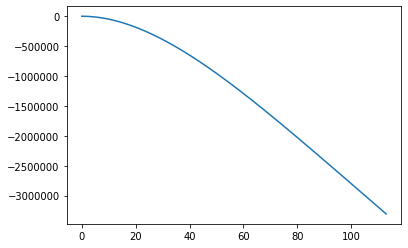

In [3]:
self.plotDisplacementDiagram()

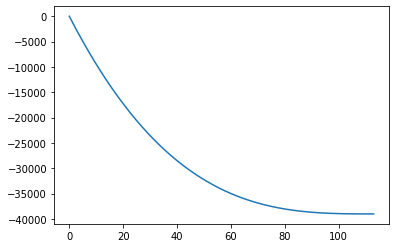

In [4]:
self.plotRotationDiagram()

In [39]:
nodes = self.initial_beam_elements.nodes
null_displacement = nodes.x[nodes.condition_boundary[:, 0]==0]
null_rotation = nodes.x[nodes.condition_boundary[:, 1]==0]
#print(null_displacement)
#print(null_rotation)

x = np.array([0, 0, 0], dtype=float)
rest_disp = np.array([0, 0, 0], dtype=float)
rest_rot = np.array([0, 0, 0], dtype=float)

x[0] = moveX(self, null_displacement[0])
rest_disp[0] = self.getDisplacement(x[0])
rest_rot[0] = self.getRotation(x[0])

if len(null_rotation)>=1:
    x[1] = moveX(self, null_rotation[0])
    rest_disp[1] = self.getDisplacement(x[1])
    rest_rot[1] = self.getRotation(x[1])
    
if len(null_displacement)>1:
    x[1] = moveX(self, null_displacement[-1])
    rest_disp[1] = self.getDisplacement(x[1])
    rest_rot[1] = self.getRotation(x[1])

if len(null_displacement)>=2:
    c1 = -(rest_disp[0] - rest_disp[1])/(x[0]-x[1])
    #c1 = -(rest_disp[0]+rest_rot[0] - rest_disp[1]-rest_rot[1])/(x[0]-x[1])
    c2 = -rest_disp[0] - c1*x[0]
elif len(null_rotation)>=1 and len(null_displacement)>=1:
    x2 = null_rotation[0]
    c1 = -self.getRotation(x2)

c2 = -rest_disp[0]  - c1*x[0]

c1, c2

0.0 0.0
0

0.0 258.891475
0.0

0.0 0.0
0.0

0.0 0.0
0

0.0 258.891475
0.0

0.0 0.0
0.0

113.0 0.0
0

113.0 258.891475
-9751.578891666672

113.0 0.0
63385.262795833325



(-29254.736675, 0.0)

In [33]:
self._c1 = c1
self._c2 = c2

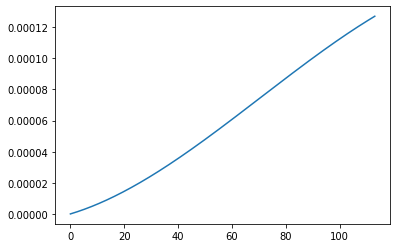

In [3]:
self.plotRotationDiagram()

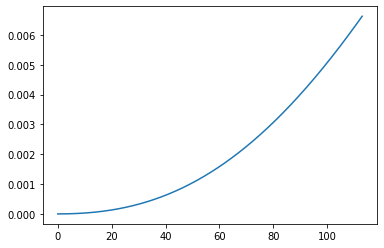

In [4]:
self.plotDisplacementDiagram()

In [13]:
-rest1 - c1*x1

0.0

In [ ]:
tests/structural/test_ftool_compared.py::test_v47 80745.24861216143 0.0
tests/structural/test_ftool_compared.py::test_free_crimped 56646.315566668636 -4805185.244275128


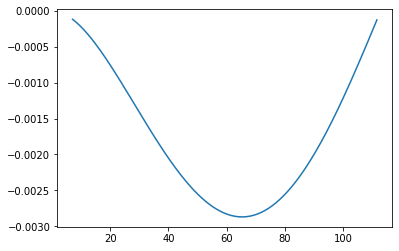

In [2]:
plt.plot(x_displacement, displacement_diagram_v47)

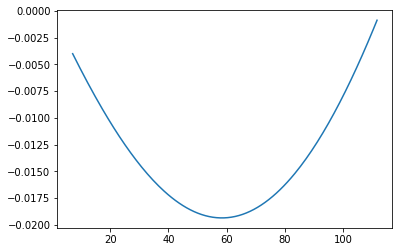

In [3]:
plt.plot(x_displacement, displacement_fconcrete)

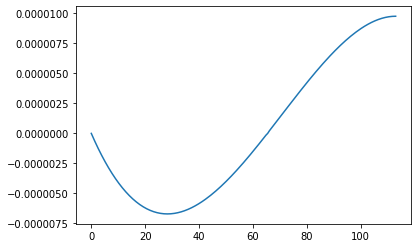

In [4]:
plt.plot(x_rotation, rotation_diagram_v47)

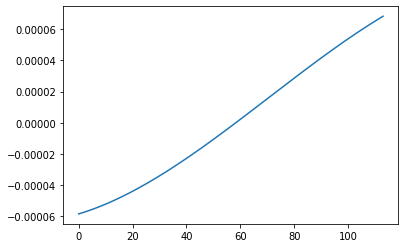

In [5]:
plt.plot(x_rotation, rotation_fconcrete)

In [4]:
for x, ft, fc in zip(x_rotation, rotation_diagram_v47, rotation_fconcrete):
    
    if ft != approx(fc, abs=0.000001):
        print(x, ft, fc)

1.284091 -6.473614e-07 6.84982760201947e-07
1.926136 -9.570632e-07 1.0414528074543865e-06
2.568182 -1.25756e-06 1.4071280169373479e-06
3.210227 -1.548939e-06 1.78192122534293e-06
3.852273 -1.831285e-06 2.1657475757763296e-06
4.494318 -2.104685e-06 2.558519848388087e-06
5.136364 -2.369224e-06 2.960153242289019e-06
5.778409 -2.624988e-06 3.3705604821599846e-06
6.420455 -2.872064e-06 3.789656822045542e-06
7.0625 -3.110538e-06 4.21735493222875e-06
7.704545 -3.340495e-06 4.653569434614221e-06
8.346591 -3.562022e-06 5.098215004164509e-06
8.988636 -3.775204e-06 5.551204231575755e-06
9.630682 -3.980129e-06 6.0124525035373905e-06
10.272727 -4.176881e-06 6.481872359027445e-06
10.914773 -4.365546e-06 6.959379235917519e-06
11.556818 -4.546211e-06 7.4448856225394145e-06
12.198864 -4.718963e-06 7.938307006875023e-06
12.840909 -4.883885e-06 8.439555827681793e-06
13.482955 -5.041066e-06 8.94854762198003e-06
14.125 -5.190591e-06 9.465194780024703e-06
14.767045 -5.332545e-06 9.989412064471393e-06
15.409

In [16]:
displacement_diagram_v47

array([-0.09629041, -0.09610854, -0.09592667, -0.0957448 , -0.09556292,
       -0.09538105, -0.09519918, -0.09501731, -0.09483544, -0.09465357,
       -0.0944717 , -0.09428983, -0.09410796, -0.09392609, -0.09374422,
       -0.09356235, -0.09338048, -0.09319861, -0.09301674, -0.09283487,
       -0.092653  , -0.09247113, -0.09228926, -0.0921074 , -0.09192553,
       -0.09174366, -0.0915618 , -0.09137993, -0.09119807, -0.09101621,
       -0.09083434, -0.09065248, -0.09047062, -0.09028876, -0.09010691,
       -0.08992505, -0.08974319, -0.08956134, -0.08937949, -0.08919764,
       -0.08901579, -0.08883394, -0.0886521 , -0.08847025, -0.08828841,
       -0.08810657, -0.08792473, -0.0877429 , -0.08756106, -0.08737923,
       -0.08719741, -0.08701558, -0.08683376, -0.08665194, -0.08647012,
       -0.08628831, -0.0861065 , -0.08592469, -0.08574289, -0.08556109,
       -0.08537929, -0.0851975 , -0.08501571, -0.08483393, -0.08465215,
       -0.08447037, -0.0842886 , -0.08410684, -0.08392507, -0.08

In [18]:
beam.getDisplacement(110.435115)

-9.463359754728848e-06

In [ ]:
0.642045	-21.451473